In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


# Load data and clean it

In [2]:
#Load the data
hr_data = pd.read_csv("C:/Users/weiji/OneDrive/Desktop/attrition/hrdataset.csv")
hr_data.head()

,SN,Resignation,rankcoded,vocationcoded,gendercoded,racecoded,agecoded,educationcoded,yiscoded,unitcoded,mthsinappt,mthsingrade
0,1,1,3,1,1,1,2,1,1,5,1,1
1,2,1,3,1,1,1,2,1,1,5,1,1
2,3,1,3,1,1,1,3,1,3,5,36,62
3,4,1,5,2,1,1,3,2,3,5,14,50
4,5,1,2,1,1,2,3,1,5,5,19,68


In [3]:
#check the structure of data in dataset
hr_data.dtypes

SN                int64
Resignation       int64
rankcoded         int64
vocationcoded     int64
gendercoded       int64
racecoded         int64
agecoded          int64
educationcoded    int64
yiscoded          int64
unitcoded         int64
mthsinappt        int64
mthsingrade       int64
dtype: object

In [4]:
#check if there are missing values
hr_data.isnull().sum()


SN                0
Resignation       0
rankcoded         0
vocationcoded     0
gendercoded       0
racecoded         0
agecoded          0
educationcoded    0
yiscoded          0
unitcoded         0
mthsinappt        0
mthsingrade       0
dtype: int64

# Data Exploration


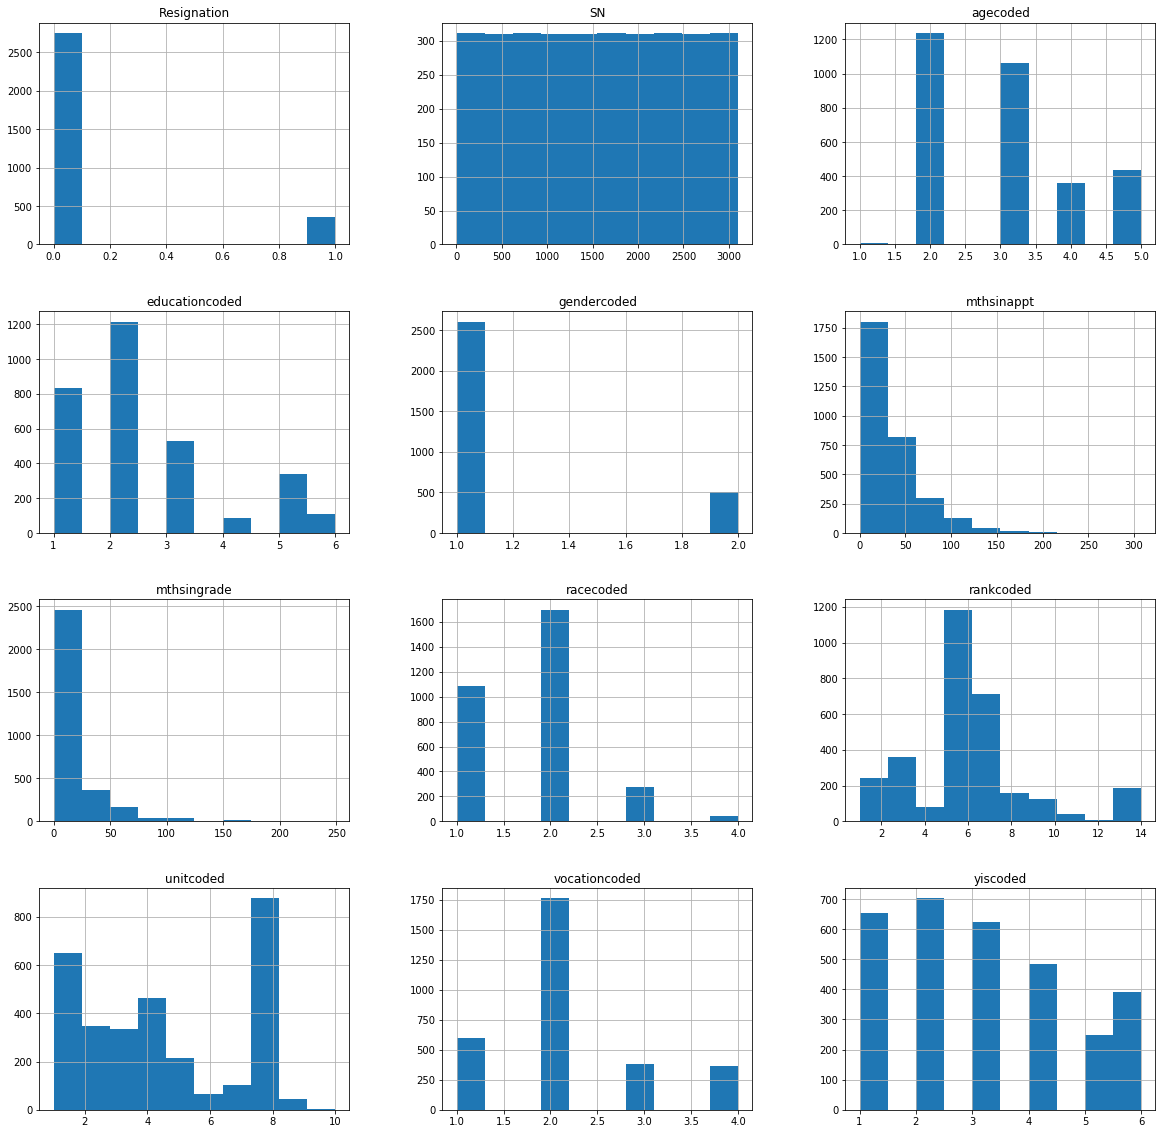

In [5]:
#have a look at distribution of data

hr_data.hist(figsize=(20,20))
plt.show()

In [6]:
#Have a look at how many people resigned and how many stayed
hr_data['Resignation'].value_counts()

0    2749
1     356
Name: Resignation, dtype: int64

In [7]:
#Compare variables between those who resigned and those who did not
hr_data.groupby('Resignation').mean()


,SN,rankcoded,vocationcoded,gendercoded,racecoded,agecoded,educationcoded,yiscoded,unitcoded,mthsinappt,mthsingrade
Resignation,,,,,,,,,,,
0,1731.0,6.047290,2.136049,1.150600,1.797381,3.034922,2.457257,3.148418,4.344125,35.140778,14.884685
1,178.5,6.817416,2.379213,1.241573,1.547753,2.682584,2.143258,2.278090,5.308989,32.053371,37.929775


In [8]:
hr_data.head()

,SN,Resignation,rankcoded,vocationcoded,gendercoded,racecoded,agecoded,educationcoded,yiscoded,unitcoded,mthsinappt,mthsingrade
0,1,1,3,1,1,1,2,1,1,5,1,1
1,2,1,3,1,1,1,2,1,1,5,1,1
2,3,1,3,1,1,1,3,1,3,5,36,62
3,4,1,5,2,1,1,3,2,3,5,14,50
4,5,1,2,1,1,2,3,1,5,5,19,68


In [9]:
#Create Dummy Variables

cat_vars=['rankcoded','vocationcoded','gendercoded','racecoded','agecoded','educationcoded','yiscoded','unitcoded']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr_data[var], prefix=var)
    hr_data =hr_data.join(cat_list)


In [10]:
#double check to see if the columns have the dummy variables
hr_data.columns

Index(['SN', 'Resignation', 'rankcoded', 'vocationcoded', 'gendercoded',
       'racecoded', 'agecoded', 'educationcoded', 'yiscoded', 'unitcoded',
       'mthsinappt', 'mthsingrade', 'rankcoded_1', 'rankcoded_2',
       'rankcoded_3', 'rankcoded_4', 'rankcoded_5', 'rankcoded_6',
       'rankcoded_7', 'rankcoded_8', 'rankcoded_9', 'rankcoded_10',
       'rankcoded_11', 'rankcoded_12', 'rankcoded_13', 'rankcoded_14',
       'vocationcoded_1', 'vocationcoded_2', 'vocationcoded_3',
       'vocationcoded_4', 'gendercoded_1', 'gendercoded_2', 'racecoded_1',
       'racecoded_2', 'racecoded_3', 'racecoded_4', 'agecoded_1', 'agecoded_2',
       'agecoded_3', 'agecoded_4', 'agecoded_5', 'educationcoded_1',
       'educationcoded_2', 'educationcoded_3', 'educationcoded_4',
       'educationcoded_5', 'educationcoded_6', 'yiscoded_1', 'yiscoded_2',
       'yiscoded_3', 'yiscoded_4', 'yiscoded_5', 'yiscoded_6', 'unitcoded_1',
       'unitcoded_2', 'unitcoded_3', 'unitcoded_4', 'unitcoded_5',
     

In [11]:
#Remove all the columns that are not numerical and not dummy variables
hr_data2 = hr_data.drop(["SN","rankcoded","vocationcoded","gendercoded","racecoded","agecoded","educationcoded","yiscoded","unitcoded"], axis=1)
hr_data2.columns.values


array(['Resignation', 'mthsinappt', 'mthsingrade', 'rankcoded_1',
       'rankcoded_2', 'rankcoded_3', 'rankcoded_4', 'rankcoded_5',
       'rankcoded_6', 'rankcoded_7', 'rankcoded_8', 'rankcoded_9',
       'rankcoded_10', 'rankcoded_11', 'rankcoded_12', 'rankcoded_13',
       'rankcoded_14', 'vocationcoded_1', 'vocationcoded_2',
       'vocationcoded_3', 'vocationcoded_4', 'gendercoded_1',
       'gendercoded_2', 'racecoded_1', 'racecoded_2', 'racecoded_3',
       'racecoded_4', 'agecoded_1', 'agecoded_2', 'agecoded_3',
       'agecoded_4', 'agecoded_5', 'educationcoded_1', 'educationcoded_2',
       'educationcoded_3', 'educationcoded_4', 'educationcoded_5',
       'educationcoded_6', 'yiscoded_1', 'yiscoded_2', 'yiscoded_3',
       'yiscoded_4', 'yiscoded_5', 'yiscoded_6', 'unitcoded_1',
       'unitcoded_2', 'unitcoded_3', 'unitcoded_4', 'unitcoded_5',
       'unitcoded_6', 'unitcoded_7', 'unitcoded_8', 'unitcoded_9',
       'unitcoded_10'], dtype=object)

In [12]:
#Put all the independent variables into a list
hr_vars=hr_data2.columns.values.tolist()


#Define Y-axis as outcome variable and X-axis as the independent variables
y= ['Resignation']
X= [i for i in hr_vars if i not in y]



# Feature Selection
The Recursive Feature Elimination (RFE) method works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute.

We could use feature selection to help us decide which variables are significant that can predict employee turnover with great accuracy. 

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


#Identify optimal number of features to put into the regression model
nof_list= np.arange(1,53)            
high_score=0
#Variable to store the optimum features

nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(hr_data2[X],hr_data2[y], test_size = 0.3)
    model = RandomForestClassifier()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

ValueError: Must pass DataFrame with boolean values only

RFE suggests that we select X number features, so we can input X number of features into the RFE model if we are keen

In [13]:
#Select 20 features to test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rfe = RFE(model, 20)
rfe = rfe.fit(hr_data2[X], hr_data2[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\weiji\Anaconda3\lib\site-packages

[ True  True False False False False  True  True  True False False  True
 False False False  True  True False False  True  True False  True False
 False False False  True  True False  True  True  True False False False
 False  True  True  True False False False False False False False False
 False False  True False False]
[ 1  1 32 29 11 23  1  1  1  9 26  1 24 31  5  1  1  2  4  1  1 17  1  6
 19 34 33  1  1 15  1  1  1 14 22  8 28  1  1  1 10 21 16  7 13 18 12  3
 30 25  1 27 20]


C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
#Show which are the features that were selected
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols, query_cols, sorter = sidx)]

feature_index = []
features = []

column_index(hr_data2[X], hr_data2[X].columns.values)

for num, i in enumerate(rfe.get_support(), start=0):
    if i == True:
        feature_index.append(str(num))

for num, i in enumerate(hr_data2[X].columns.values, start=0):
    if str(num) in feature_index:
        features.append(hr_data2[X].columns.values[num])

print("Features Selected: {}\n".format(len(feature_index)))
print("Features Indexes: \n{}\n".format(feature_index))
print("Feature Names: \n{}".format(features))

Features Selected: 20

Features Indexes: 
['0', '1', '6', '7', '8', '11', '15', '16', '19', '20', '22', '27', '28', '30', '31', '32', '37', '38', '39', '50']

Feature Names: 
['mthsinappt', 'mthsingrade', 'rankcoded_5', 'rankcoded_6', 'rankcoded_7', 'rankcoded_10', 'rankcoded_14', 'vocationcoded_1', 'vocationcoded_4', 'gendercoded_1', 'racecoded_1', 'agecoded_2', 'agecoded_3', 'agecoded_5', 'educationcoded_1', 'educationcoded_2', 'yiscoded_1', 'yiscoded_2', 'yiscoded_3', 'unitcoded_8']


In [15]:
print (hr_data2[features].head(10))

   mthsinappt  mthsingrade  rankcoded_5  rankcoded_6  rankcoded_7  \
0           1            1            0            0            0   
1           1            1            0            0            0   
2          36           62            0            0            0   
3          14           50            1            0            0   
4          19           68            0            0            0   
5           8            8            0            0            1   
6          11           11            0            0            0   
7           7           71            0            0            0   
8          11           29            0            0            0   
9           4            4            0            0            1   

   rankcoded_10  rankcoded_14  vocationcoded_1  vocationcoded_4  \
0             0             0                1                0   
1             0             0                1                0   
2             0             0          

In [16]:
#Select only the variables which are "1" based on the feature selection


X=hr_data2[features]
y=hr_data2['Resignation']

# We can try using 3 methods for this analysis: Logistic Regression; Random Forest Trees and Support Vector Machine

# Logistic Regression

In [17]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

#Look at the R square and adjusted R square values
print (logreg.score(X, y), 1 - (1-logreg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))


Logistic regression accuracy: 0.894
0.9075684380032206 0.9069690115311274


In [20]:
#Get the predicted probabilities of each case. It will give an array of [Prob of 0 and Prob of 1 for the outcome variable]

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_y = logreg.predict_proba(X)

predprob = pd.DataFrame({"probabilities":list(pred_y)})




C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
#append the predicted probabilities to the hr_data2 dataframe

#For probabilities, first value is probability of outcome = 0, second value is probability of outcome = 1

hr_data2['probabilities'] = predprob.values
hr_data3 = pd.DataFrame(hr_data2)
print (hr_data3.head(10)) 


   Resignation  mthsinappt  mthsingrade  rankcoded_1  rankcoded_2  \
0            1           1            1            0            0   
1            1           1            1            0            0   
2            1          36           62            0            0   
3            1          14           50            0            0   
4            1          19           68            0            1   
5            1           8            8            0            0   
6            1          11           11            0            0   
7            1           7           71            0            1   
8            1          11           29            0            1   
9            1           4            4            0            0   

   rankcoded_3  rankcoded_4  rankcoded_5  rankcoded_6  rankcoded_7  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0   

In [23]:
#Split probabilities ito 2 columns

hr_data3[['p1','p2']] = pd.DataFrame(hr_data3.probabilities.values.tolist(), index= hr_data3.index)

hr_data3



,Resignation,mthsinappt,mthsingrade,rankcoded_1,rankcoded_2,rankcoded_3,rankcoded_4,rankcoded_5,rankcoded_6,rankcoded_7,...,unitcoded_4,unitcoded_5,unitcoded_6,unitcoded_7,unitcoded_8,unitcoded_9,unitcoded_10,probabilities,p1,p2
0,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,"[0.7362066641240841, 0.26379333587591586]",0.736207,0.263793
1,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,"[0.7362066641240841, 0.26379333587591586]",0.736207,0.263793
2,1,36,62,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,"[0.22692202912838033, 0.7730779708716197]",0.226922,0.773078
3,1,14,50,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,"[0.7474439836279893, 0.25255601637201075]",0.747444,0.252556
4,1,19,68,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,"[0.5648965806376557, 0.4351034193623443]",0.564897,0.435103
5,1,8,8,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,"[0.7832903050036046, 0.21670969499639542]",0.783290,0.216710
6,1,11,11,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,"[0.7642038050249513, 0.2357961949750486]",0.764204,0.235796
7,1,7,71,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,"[0.354834588606215, 0.645165411393785]",0.354835,0.645165
8,1,11,29,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,"[0.6412379289636154, 0.35876207103638463]",0.641238,0.358762
9,1,4,4,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,"[0.9199908474724169, 0.08000915252758313]",0.919991,0.080009


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [25]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))


Random Forest Accuracy: 0.970


In [26]:
pred_y2 = rf.predict_proba(X)

predprob2 = pd.DataFrame({"probabilities":list(pred_y2)})
hr_data['probabilities'] = predprob2.values
hr_data3 = pd.DataFrame(hr_data)
print (hr_data3.head(10)) 

   SN  Resignation  rankcoded  vocationcoded  gendercoded  racecoded  \
0   1            1          3              1            1          1   
1   2            1          3              1            1          1   
2   3            1          3              1            1          1   
3   4            1          5              2            1          1   
4   5            1          2              1            1          2   
5   6            1          7              2            2          1   
6   7            1          3              1            1          1   
7   8            1          2              1            1          1   
8   9            1          2              1            1          1   
9  10            1          7              2            1          2   

   agecoded  educationcoded  yiscoded  unitcoded  \
0         2               1         1          5   
1         2               1         1          5   
2         3               1         3          5   

In [27]:
#split the probabilities into 2 columns
hr_data3[['p1','p2']] = pd.DataFrame(hr_data.probabilities.values.tolist(), index= hr_data.index)

hr_data3.head(10)

,SN,Resignation,rankcoded,vocationcoded,gendercoded,racecoded,agecoded,educationcoded,yiscoded,unitcoded,...,unitcoded_4,unitcoded_5,unitcoded_6,unitcoded_7,unitcoded_8,unitcoded_9,unitcoded_10,probabilities,p1,p2
0,1,1,3,1,1,1,2,1,1,5,...,0,1,0,0,0,0,0,"[0.005, 0.995]",0.005000,0.995000
1,2,1,3,1,1,1,2,1,1,5,...,0,1,0,0,0,0,0,"[0.005, 0.995]",0.005000,0.995000
2,3,1,3,1,1,1,3,1,3,5,...,0,1,0,0,0,0,0,"[0.01, 0.99]",0.010000,0.990000
3,4,1,5,2,1,1,3,2,3,5,...,0,1,0,0,0,0,0,"[0.23, 0.77]",0.230000,0.770000
4,5,1,2,1,1,2,3,1,5,5,...,0,1,0,0,0,0,0,"[0.2, 0.8]",0.200000,0.800000
5,6,1,7,2,2,1,1,2,1,5,...,0,1,0,0,0,0,0,"[0.16, 0.84]",0.160000,0.840000
6,7,1,3,1,1,1,2,1,2,5,...,0,1,0,0,0,0,0,"[0.2, 0.8]",0.200000,0.800000
7,8,1,2,1,1,1,4,1,5,5,...,0,1,0,0,0,0,0,"[0.02, 0.98]",0.020000,0.980000
8,9,1,2,1,1,1,3,1,3,5,...,0,1,0,0,0,0,0,"[0.03, 0.97]",0.030000,0.970000
9,10,1,7,2,1,2,2,2,1,5,...,0,1,0,0,0,0,0,"[0.9466666666666668, 0.05333333333333334]",0.946667,0.053333


In [41]:
#Save the dataset
hr_data3.to_csv("hr_dataanalysed.csv")


# Support Vector Machine

In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))


Support vector machine accuracy: 0.912


Based on the model accuracy figures, Random Forest Trees has the highest

# Precision and recall
We should construct a confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of classifications.

In [31]:
from sklearn.metrics import classification_report


In [32]:
#check precision for Logistic Regression first
print(classification_report(y_test, logreg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       826
           1       0.56      0.31      0.40       106

   micro avg       0.89      0.89      0.89       932
   macro avg       0.74      0.64      0.67       932
weighted avg       0.88      0.89      0.88       932



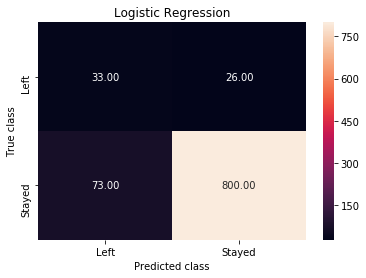

In [33]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [34]:
#check precision and recall of random forest trees
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       826
           1       0.91      0.81      0.86       106

   micro avg       0.97      0.97      0.97       932
   macro avg       0.95      0.90      0.92       932
weighted avg       0.97      0.97      0.97       932



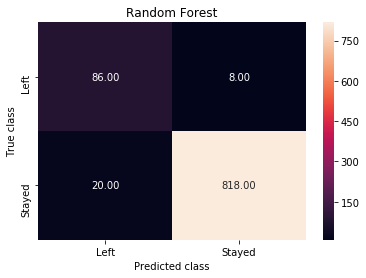

In [35]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [36]:
#check precision and recall of support vector machine
print(classification_report(y_test, svc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       826
           1       0.71      0.39      0.50       106

   micro avg       0.91      0.91      0.91       932
   macro avg       0.82      0.68      0.73       932
weighted avg       0.90      0.91      0.90       932



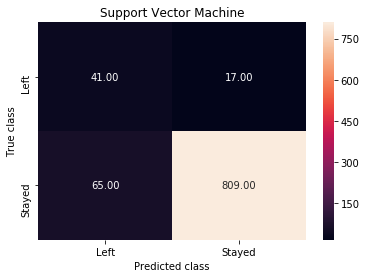

In [37]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

The F1 score for Random Forest Trees is the highest, which means its classification accuracy is the best among the 3 techniques

# ROC Curve
Used to evalute the true positive rate for the 3 types of techniques


C:\Users\weiji\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


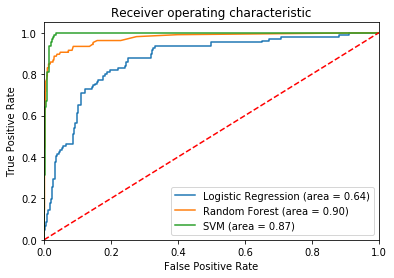

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

rbf_svc = SVC(probability=True).fit (X,y)
rbf_svc_auc = roc_auc_score(y_test, rbf_svc.predict(X_test))
rbf_fpr, rbf_tpr, rbf_thresholds = roc_curve(y_test, rbf_svc.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(rbf_fpr, rbf_tpr, label='SVM (area = %0.2f)' % rbf_svc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

For the Area Under Curve, Random Forest Trees has the highest True Positive Rate

# Based on the model accuracy, precision and recall, and AUC, Random Forest Trees has the best performance among the 3 techniques

In [39]:
#check which are the variables that are the most important in the random forest model
feature_labels = np.array(features)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

rankcoded_14-1.05%
yiscoded_2-1.34%
yiscoded_3-1.35%
educationcoded_2-1.42%
agecoded_3-1.45%
agecoded_5-1.55%
gendercoded_1-1.77%
unitcoded_8-1.92%
educationcoded_1-1.94%
rankcoded_6-2.53%
rankcoded_10-2.71%
racecoded_1-2.74%
rankcoded_7-2.93%
yiscoded_1-3.19%
agecoded_2-3.39%
vocationcoded_4-3.52%
vocationcoded_1-3.68%
rankcoded_5-4.17%
mthsinappt-13.36%
mthsingrade-43.97%


# Tuning the Random Forest Classifier to improve model accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(class_weight = "balanced",random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)